Libraries to import

In [11]:
import reader
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import importlib
import nn

Loading in the data

In [3]:
# filepath to data
filepath = "./data/mp_data"
# load datasets, you don't need to call this function in the MP
train_set, train_labels, test_set, test_labels = reader.Load_dataset(filepath)
print("Shape of train set:", train_set.shape)
print("Shape of test set:", test_set.shape)

Shape of train set: (2813, 2883)
Shape of test set: (937, 2883)


Helper functions

In [4]:
names = {0: "ship", 1: "automobile", 2: "dog", 3: "frog", 4: "horse"}

def show_train_image(index):
    img_c1 = Image.fromarray(train_set[index][: 961].reshape(31, 31))
    img_c2 = Image.fromarray(train_set[index][961: 1922].reshape(31, 31))
    img_c3 = Image.fromarray(train_set[index][1922: ].reshape(31, 31))
    img_rgb = np.zeros((31, 31, 3), 'uint8')
    img_rgb[..., 0] = img_c1
    img_rgb[..., 1] = img_c2
    img_rgb[..., 2] = img_c3
    fig = plt.figure()
    plt.axis('off')
    plt.imshow(img_rgb)
    title = "Train[" + str(index) + "]  --  " + names[train_labels[index].item()] + " -- label " + str(train_labels[index].item())
    plt.title(title)

def show_test_image(index):
    img_c1 = Image.fromarray(test_set[index][: 961].reshape(31, 31))
    img_c2 = Image.fromarray(test_set[index][961: 1922].reshape(31, 31))
    img_c3 = Image.fromarray(test_set[index][1922: ].reshape(31, 31))
    img_rgb = np.zeros((31, 31, 3), 'uint8')
    img_rgb[..., 0] = img_c1
    img_rgb[..., 1] = img_c2
    img_rgb[..., 2] = img_c3
    fig = plt.figure()
    plt.axis('off')
    plt.imshow(img_rgb)
    title = "Test[" + str(index) + "]  --  " + names[test_labels[index].item()] + " -- label " + str(test_labels[index].item())
    plt.imshow(img_rgb)
    plt.title(title)

Looking at one image

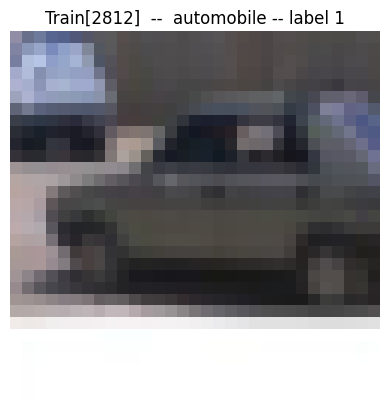

In [5]:
show_train_image(2812)

Dataloaders

In [6]:
train_set_p, test_set_p  = reader.Preprocess(train_set, test_set)
train_loader, test_loader = reader.Get_DataLoaders(train_set_p, train_labels, test_set_p, test_labels, batch_size=100)

Labels

In [7]:
batch_index = 0
# Iterate over the dataloader
for features, labels in train_loader:
    # you can train your network with the feature and label batches here
    print("Batch #", batch_index)
    print("Feature shape:", features.shape)
    print(features, "\n")
    print("Label shape:", labels.shape)
    print(labels, "\n\n")
    batch_index += 1

Batch # 0
Feature shape: torch.Size([100, 2883])
tensor([[ 0.3525,  0.3150, -0.6970,  ...,  1.2380,  1.2221,  1.3589],
        [ 0.8684,  0.9081,  0.9093,  ...,  1.0154,  1.0167,  0.9519],
        [ 0.3932,  0.3839, -0.2262,  ..., -0.6230, -0.5951, -0.5977],
        ...,
        [-0.4756,  0.1494,  0.5631,  ..., -0.6230, -0.7689, -1.1299],
        [ 1.4793,  1.5012,  1.5324,  ...,  0.9199,  0.9219,  0.8737],
        [-0.5027, -0.5816, -0.5309,  ...,  1.0631,  1.0483,  0.9989]]) 

Label shape: torch.Size([100])
tensor([0, 0, 0, 3, 1, 1, 0, 1, 4, 4, 4, 2, 1, 0, 3, 4, 1, 1, 3, 1, 1, 4, 1, 1,
        4, 4, 3, 2, 0, 4, 2, 1, 0, 1, 0, 3, 0, 1, 0, 4, 4, 0, 4, 0, 3, 2, 2, 3,
        4, 2, 3, 3, 1, 2, 3, 3, 2, 2, 2, 2, 1, 0, 4, 0, 3, 3, 0, 3, 1, 0, 0, 2,
        1, 3, 0, 0, 2, 4, 3, 2, 3, 2, 2, 3, 3, 2, 0, 3, 4, 0, 1, 0, 3, 1, 0, 0,
        4, 2, 0, 1]) 


Batch # 1
Feature shape: torch.Size([100, 2883])
tensor([[-1.7381, -1.7541, -1.7771,  ..., -1.7523, -1.7487, -1.7403],
        [-0.3127, -0.

Helper functions to test model

In [8]:
def ComputeAccuracy(model):
    pred_values = model(test_set_p)  # Predicted value of the testing set
    pred_values = pred_values.detach().numpy()  # Convert the tensor to a numpy array
    pred_labels = np.argmax(pred_values, axis=1)  # Predicted labels
    accuracy, conf_mat = reader.compute_accuracies(pred_labels, test_labels)
    print("Accuracy:", accuracy)
    print("Confusion matrix:")
    print(conf_mat, "\n")
    
def Predict(model, index):
    pred_values = model(test_set_p[index])
    pred_values = pred_values.detach().numpy()  # Convert the tensor to a numpy array
    pred_labels = np.argmax(pred_values)  # Predicted labels
    show_test_image(index)
    print("Your prediction:", names[pred_labels.item()],)

Training the network

In [12]:
reader.init_seeds(42) # fix random seed
importlib.reload(nn)
model, loss_fn, optimizer = nn.fit(train_loader, test_loader, 50) # the last parameter is the number of epochs

Epoch # 0
Epoch # 1
Epoch # 2
Epoch # 3
Epoch # 4
Epoch # 5
Epoch # 6
Epoch # 7
Epoch # 8
Epoch # 9
Epoch # 10
Epoch # 11
Epoch # 12
Epoch # 13
Epoch # 14
Epoch # 15
Epoch # 16
Epoch # 17
Epoch # 18
Epoch # 19
Epoch # 20
Epoch # 21
Epoch # 22
Epoch # 23
Epoch # 24
Epoch # 25
Epoch # 26
Epoch # 27
Epoch # 28
Epoch # 29
Epoch # 30
Epoch # 31
Epoch # 32
Epoch # 33
Epoch # 34
Epoch # 35
Epoch # 36
Epoch # 37
Epoch # 38
Epoch # 39
Epoch # 40
Epoch # 41
Epoch # 42
Epoch # 43
Epoch # 44
Epoch # 45
Epoch # 46
Epoch # 47
Epoch # 48
Epoch # 49


Testing random image in the test dataset

tensor([11.0498, -3.2936,  3.2357, -1.3638, -6.8239], grad_fn=<AddBackward0>)


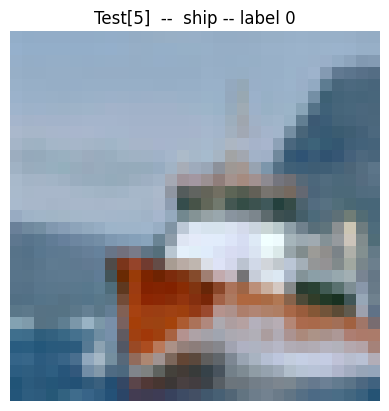

In [15]:
index = 5
show_test_image(index)

output = model(test_set_p[index])
print(output)

Computing the accuracy

In [16]:
ComputeAccuracy(model)

Accuracy: 0.6360725720384205
Confusion matrix:
[[150.  24.   5.   6.   5.]
 [ 34. 122.  12.  21.  13.]
 [ 12.  11.  92.  40.  31.]
 [  9.   9.  26. 128.  14.]
 [ 15.   7.  31.  16. 104.]] 



Make prediction

Your prediction: automobile


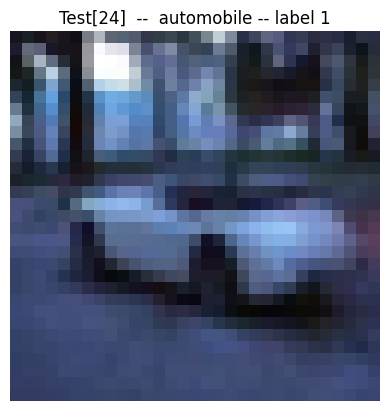

In [17]:
Predict(model, 24)